In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
epoch = 40
random_state = 0
InputLayer_nodes = 2
hiddenLayer_1_nodes = 8
OutputLayer_nodes = 3

In [3]:
import os

folder_name = "images_AS2_Q1_a"

# Get all files in the folder
files = os.listdir(folder_name)

# Loop through the files and delete them
for file in files:
    file_path = os.path.join(folder_name, file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

In [4]:
cl = ['Class1.txt','Class2.txt','Class3.txt']

df_train_data = pd.DataFrame(columns = ["a", "b", "class"])
df_valid_data = pd.DataFrame(columns = ["a", "b", "class"])
df_test_data = pd.DataFrame(columns = ["a", "b", "class"])

for i in range(len(cl)):
    dft = pd.read_csv(f'Group20/Classification/LS_Group20/{cl[i]}',names=["a", "b"], sep=" ")
    dft['class'] = i+1
    # split the dataset
    validDataPercentage = 20
    testDataPercentage = 20
    training_data, testing_data = train_test_split(dft, test_size=(testDataPercentage+validDataPercentage)*0.01, random_state=random_state)
    valid_data, testing_data = train_test_split(testing_data, test_size=(testDataPercentage/(testDataPercentage+validDataPercentage)), random_state=random_state)
    df_train_data = pd.merge(df_train_data, training_data, how='outer')
    df_valid_data = pd.merge(df_valid_data, valid_data, how='outer')
    df_test_data  = pd.merge(df_test_data , testing_data, how='outer')


df_train_data = df_train_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
df_valid_data = df_valid_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
df_test_data = df_test_data.sample(frac=1, random_state=random_state).reset_index(drop=True)

df_train_list = [df_train_data.loc[df_train_data['class'] == 1], df_train_data.loc[df_train_data['class'] == 2], df_train_data.loc[df_train_data['class'] == 3]]
df_valid_list = [df_valid_data.loc[df_valid_data['class'] == 1], df_valid_data.loc[df_valid_data['class'] == 2], df_valid_data.loc[df_valid_data['class'] == 3]]
df_test_list = [df_test_data.loc[df_test_data['class'] == 1], df_test_data.loc[df_test_data['class'] == 2], df_test_data.loc[df_test_data['class'] == 3]]


print(df_train_data.shape)
print(df_valid_data.shape)
print(df_test_data.shape)

(900, 3)
(300, 3)
(300, 3)


In [5]:
# df_nls = pd.read_csv('Group20/Classification/NLS_Group20.txt', header=None, delimiter=" ", skiprows=1)
# df_nls = df_nls.iloc[: , :-1]
# df_nls = df_nls.rename(columns={0: 'a', 1: 'b'})

# temp_df = [df_nls.iloc[:500,[0,1]], df_nls.iloc[500:1000,[0,1]], df_nls.iloc[1000:1500,[0,1]]]

# df_train_data = pd.DataFrame(columns = ["a", "b", "class"])
# df_valid_data = pd.DataFrame(columns = ["a", "b", "class"])
# df_test_data = pd.DataFrame(columns = ["a", "b", "class"])

# for i in range(3):
#     temp_df[i]['class'] = i+1
#     # split the dataset
#     validDataPercentage = 20
#     testDataPercentage = 20
#     training_data, testing_data = train_test_split(temp_df[i], test_size=(testDataPercentage+validDataPercentage)*0.01, random_state=random_state)
#     valid_data, testing_data = train_test_split(testing_data, test_size=(testDataPercentage/(testDataPercentage+validDataPercentage)), random_state=random_state)
#     df_train_data = pd.merge(df_train_data, training_data, how='outer')
#     df_valid_data = pd.merge(df_valid_data, valid_data, how='outer')
#     df_test_data  = pd.merge(df_test_data , testing_data, how='outer')


# df_train_data = df_train_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
# df_valid_data = df_valid_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
# df_test_data = df_test_data.sample(frac=1, random_state=random_state).reset_index(drop=True)

# df_train_list = [df_train_data.loc[df_train_data['class'] == 1], df_train_data.loc[df_train_data['class'] == 2], df_train_data.loc[df_train_data['class'] == 3]]
# df_valid_list = [df_valid_data.loc[df_valid_data['class'] == 1], df_valid_data.loc[df_valid_data['class'] == 2], df_valid_data.loc[df_valid_data['class'] == 3]]
# df_test_list = [df_test_data.loc[df_test_data['class'] == 1], df_test_data.loc[df_test_data['class'] == 2], df_test_data.loc[df_test_data['class'] == 3]]


# print(df_train_data.shape)
# print(df_valid_data.shape)
# print(df_test_data.shape)

In [6]:
def saveImage(plt, folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    plt.savefig(file_path)

In [7]:
# list of list in which first index input matrix and at second index output matrix and so on for each model
w_matrix_dict = {}

# Input Matrix: (d+1) x J
w_i_h1_matrix = np.zeros((InputLayer_nodes+1, hiddenLayer_1_nodes))

# Output Matrix: (j+1) x K
w_o_matrix = np.zeros((hiddenLayer_1_nodes+1, OutputLayer_nodes))

print('w_i_h1_matrix:\n', w_i_h1_matrix,'\n')
print('w_o_matrix:\n',w_o_matrix)

w_i_h1_matrix:
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] 

w_o_matrix:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [8]:
def f(ak):
    return 1/(1+np.exp(-ak))

def g(aj):
    return 1/(1+np.exp(-aj))

def E(yn,ynHat_val):
    return 0.5*((yn-ynHat_val)**2)

def delta_n_k_o(ynk,ynHatk,ank):
    return (ynk-ynHatk)*f(ank)*(1-f(ank))

def deltaWOutput(eta,delta_n_k_o_value,hnj):
    return eta*delta_n_k_o_value*hnj

def deltaW_i_h1(eta, OutputLayer_nodes,delta_n_k_o_value_list,j, anj, xi):
    temp = 0
    for k in range(OutputLayer_nodes):
        temp+=delta_n_k_o_value_list[k]*w_o_matrix[j][k]
    return eta*temp*g(anj)*(1-g(anj))*xi

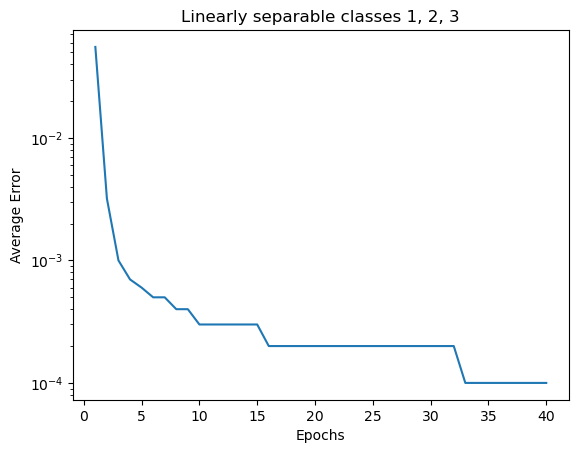

In [9]:
for ds in range(1):
    averageErrorList = []
    for epochIter in range(epoch):
        df_train_data = df_train_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
        # eta = 1/(epochIter+1)
        eta = 1 / (1 + np.log(epochIter+1))
        trainingExamplesLength = df_train_data.shape[0]
        instanetaneousErrorList = []
        for i in range(trainingExamplesLength):
            
            temp = ([0]*OutputLayer_nodes)
            temp[df_train_data.iloc[i,-1]-1] = 1
            yn = np.array(temp)

            xn = df_train_data.iloc[i,:-1]
            xnHat = np.array([1]+xn.to_list())
            
            aj_value_list = []
            hjHat = [1]
            for j in range(hiddenLayer_1_nodes):
                aj = np.dot(xnHat, w_i_h1_matrix[:,j])
                aj_value_list.append(aj)
                hj = g(aj)
                hjHat.append(hj)
            hjHat = np.array(hjHat)

            ak_value_list = []
            ynHat_val = []
            for k in range(OutputLayer_nodes):
                ak = np.dot(hjHat, w_o_matrix[:,k])
                ak_value_list.append(ak)
                f_ak_value = f(ak)
                ynHat_val.append(f_ak_value)
            ynHat_val = np.array(ynHat_val)
            
            instanetaneousError = E(yn,ynHat_val)
            instanetaneousErrorList.append(instanetaneousError)
            
            delta_n_k_o_value_list = []
            # Update Output Matrix: (j+1) x K
            for j in range(hiddenLayer_1_nodes+1):
                for k in range(OutputLayer_nodes):
                    delta_n_k_o_value = delta_n_k_o(yn[k],ynHat_val[k],ak_value_list[k])
                    delta_n_k_o_value_list.append(delta_n_k_o_value)
                    w_o_matrix[j][k]+=deltaWOutput(eta,delta_n_k_o_value,hjHat[j])

            
            # Update Input Matrix: (d+1) x J
            for d in range(InputLayer_nodes+1):
                for j in range(hiddenLayer_1_nodes):
                    w_i_h1_matrix[d][j]+=deltaW_i_h1(eta, OutputLayer_nodes, delta_n_k_o_value_list, j, aj_value_list[j], xnHat[d])
                
            # print(w_o_matrix,w_i_h1_matrix)
            # continue

        instanetaneousErrorList = np.array(instanetaneousErrorList)
        averageError = np.mean(instanetaneousErrorList)
        averageErrorList.append(float(f'{averageError:.4f}'))

    w_matrix_dict[ds] = {0:w_i_h1_matrix, 1:w_o_matrix}
    
    plt.plot([i+1 for i in range(epoch)],averageErrorList)
    title = f'Linearly separable classes 1, 2, 3'
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Average Error')
    plt.yscale("log")
    # save the plot to a file in a folder
    saveImage(plt, folder_name, title)
    plt.show()


In [10]:
print(len(w_matrix_dict))
# w_matrix_dict

1


In [11]:
def ynHat(xn, w_i_h1_matrix, w_o_matrix):
    # xn = [0.34, 1.34]
    xnHat = np.array([1]+xn.to_list())
    hjHat = [1]
    aj_value_list = []
    for j in range(hiddenLayer_1_nodes):
        aj = np.dot(xnHat, w_i_h1_matrix[:,j])
        aj_value_list.append(aj)
        hj = g(aj)
        hjHat.append(hj)
    hjHat = np.array(hjHat)
    
    ynHat_val = []
    ak_value_list = []
    for k in range(OutputLayer_nodes):
        ak = np.dot(hjHat, w_o_matrix[:,k])
        ak_value_list.append(ak)
        f_ak_value = f(ak)
        ynHat_val.append(f_ak_value)
    ynHat_val = np.array(ynHat_val)
    return ynHat_val, aj_value_list, ak_value_list

def predicted_label_trio(xn, w_i_h1_matrix, w_o_matrix):
    # xn = [0.1, 0.2]
    ynHat_val, aj_value_list, ak_value_list = ynHat(xn, w_i_h1_matrix, w_o_matrix)
    max_ind = 0
    max_val = -999
    for i in range(len(ynHat_val)):
        if(ynHat_val[i]>max_val):
            max_val = ynHat_val[i]
            max_ind = i
    predicted_class = max_ind+1
    
    return predicted_class, aj_value_list, ak_value_list

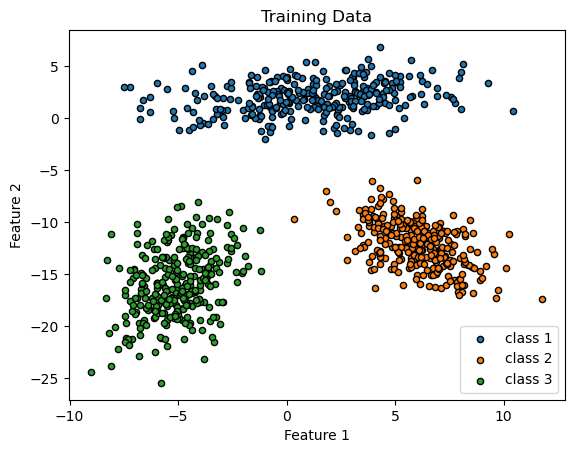

In [12]:
plt.scatter(df_train_list[0].iloc[:, 0], df_train_list[0].iloc[:, 1], s=20, edgecolor='k', label='class 1')
plt.scatter(df_train_list[1].iloc[:, 0], df_train_list[1].iloc[:, 1], s=20, edgecolor='k', label='class 2')
plt.scatter(df_train_list[2].iloc[:, 0], df_train_list[2].iloc[:, 1], s=20, edgecolor='k', label='class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
title = 'Training Data'
plt.title(title)
plt.legend()
saveImage(plt, folder_name, title)
plt.show()

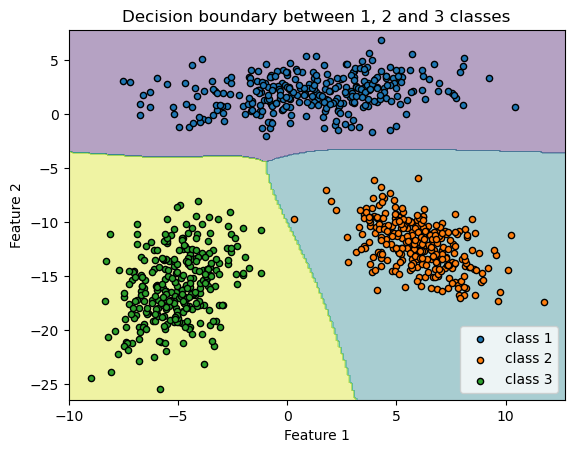

In [13]:
# Define the grid of points to plot the decision boundary
x_min = df_train_data.iloc[:, 0].min() - 1
x_max = df_train_data.iloc[:, 0].max() + 1
y_min = df_train_data.iloc[:, 1].min() - 1
y_max = df_train_data.iloc[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels of the grid points
gridPoints = np.c_[xx.ravel(), yy.ravel()]
gridPoints = pd.DataFrame(gridPoints, columns=['a', 'b'])
gridResult = []
for i in range(len(gridPoints)):
    predicted_class, aj_value_list, ak_value_list = predicted_label_trio(gridPoints.iloc[i,:], w_matrix_dict[0][0], w_matrix_dict[0][1])
    gridResult.append(predicted_class)

gridResult = np.array(gridResult)
gridResult = gridResult.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, gridResult, alpha=0.4)
plt.scatter(df_train_list[0].iloc[:, 0], df_train_list[0].iloc[:, 1], s=20, edgecolor='k', label='class 1')
plt.scatter(df_train_list[1].iloc[:, 0], df_train_list[1].iloc[:, 1], s=20, edgecolor='k', label='class 2')
plt.scatter(df_train_list[2].iloc[:, 0], df_train_list[2].iloc[:, 1], s=20, edgecolor='k', label='class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
title = f'Decision boundary between 1, 2 and 3 classes'
plt.title(title)
plt.legend()
saveImage(plt, folder_name, title)
plt.show()

In [14]:
y_pred = []
y_true = []

hj1_value_dict = {}
for class_num in range(OutputLayer_nodes):
    hj1_value_dict[class_num] = {}
    for neuron_num in range(hiddenLayer_1_nodes):
        hj1_value_dict[class_num][neuron_num] = []

hk_value_dict = {}
for class_num in range(OutputLayer_nodes):
    hk_value_dict[class_num] = {}
    for neuron_num in range(OutputLayer_nodes):
        hk_value_dict[class_num][neuron_num] = []

for ds in range(len(df_test_list)):
    testExampleLength = df_test_list[ds].shape[0]
    for i in range(testExampleLength):
        xn = df_test_list[ds].iloc[i,:-1]
        yn = df_test_list[ds].iloc[i,-1]
        y_true.append(yn)
        predicted_class, aj_value_list, ak_value_list = predicted_label_trio(xn, w_matrix_dict[0][0], w_matrix_dict[0][1])
        
        for j in range(len(aj_value_list)):
            temp = xn.tolist()
            temp.append(g(aj_value_list[j]))
            hj1_value_dict[ds][j].append(temp)
        
        for k in range(len(ak_value_list)):
            temp = xn.tolist()
            temp.append(f(ak_value_list[k]))
            hk_value_dict[ds][k].append(temp)

        y_pred.append(predicted_class)

print(hj1_value_dict)
print(hk_value_dict)

{0: {0: [[-1.8329, 1.3112, 0.9251864146548596], [-1.6476, 1.7009, 0.9371565007651704], [0.50368, 1.8002, 0.9707980404233948], [0.81519, 3.4961, 0.984345751289377], [-0.10719, 1.0448, 0.9548174542543667], [2.1654, 1.1029, 0.9798301023359367], [1.137, 0.52766, 0.9656548145346351], [5.9452, 2.17, 0.9961981286111627], [5.4069, 1.8056, 0.9948448644781877], [0.15271, 2.9735, 0.9768386108867404], [2.336, 2.199, 0.9864015738614319], [-1.5696, 2.5302, 0.9519940786760216], [-3.2526, 1.33, 0.8820599426971747], [6.1117, 0.92444, 0.9947381482935208], [1.0855, 2.9377, 0.9831265438697402], [5.2112, 4.6085, 0.9976741876444293], [-0.72353, 1.9084, 0.9567961891248364], [1.8934, 5.5967, 0.9943967246419863], [4.4848, -0.14442, 0.9869735807073927], [-7.6028, 1.5511, 0.6275588139462546], [-1.7484, 0.67392, 0.9127528794407531], [0.49255, 3.049, 0.9799056786273533], [1.5308, 3.3171, 0.987158892496609], [-2.0952, 3.6701, 0.9589974910613811], [-1.3479, 3.4347, 0.9660088193961753], [0.078626, 3.3802, 0.978986715

Classification accuracy:  1.0
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


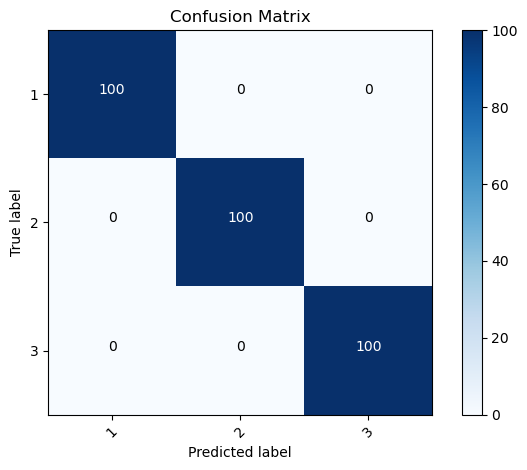

In [15]:
# calculate classification accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Classification accuracy: ', accuracy)

# Compute confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # save the plot to a file in a folder
    saveImage(plt, folder_name, title)


cnf_matrix = confusion_matrix(y_true, y_pred,labels=[1, 2, 3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2, 3],
                      title='Confusion Matrix')

In [16]:
def scatterPlot3d(neuronSize, classSize, h_value_dict, titleBegin):
    for neuron_num in range(neuronSize):
        # 0,1,2 index have class 1,2,3 respectively
        X = []
        Y = []
        Z = []

        for class_num in range(classSize):
            x, y, z = zip(*(h_value_dict[class_num][neuron_num]))
            X.append(x)
            Y.append(y)
            Z.append(z)

        # Creating figure
        fig = plt.figure(figsize = (5, 4))
        ax = plt.axes(projection ="3d")

        # Creating plot
        ax.scatter3D(X[0], Y[0], Z[0], color = "r", marker='o', alpha = 0.3)
        ax.scatter3D(X[1], Y[1], Z[1], color = "g", marker='o', alpha = 0.3)
        ax.scatter3D(X[2], Y[2], Z[2], color = "b", marker='o', alpha = 0.3)
        ax.set_xlabel('Feature 1', fontweight ='bold')
        ax.set_ylabel('Feature 2', fontweight ='bold')
        ax.set_zlabel('Activation Value', fontweight ='bold')
        # ax.zaxis.labelpad=-1
        ax.legend(['class1','class2','class3'])
        title = f'{titleBegin} {neuron_num+1}'
        plt.title(title)
        saveImage(plt, folder_name, title)
        plt.show()

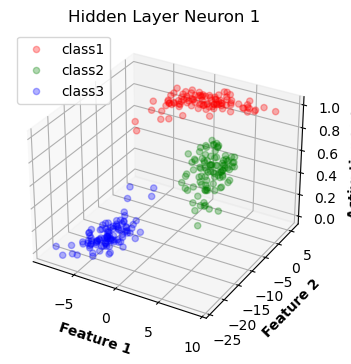

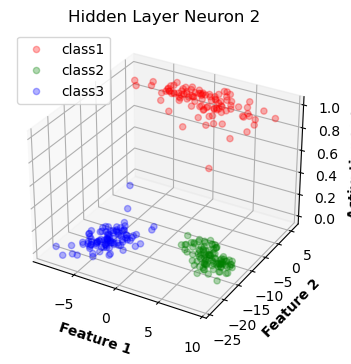

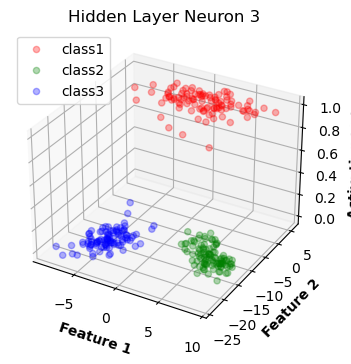

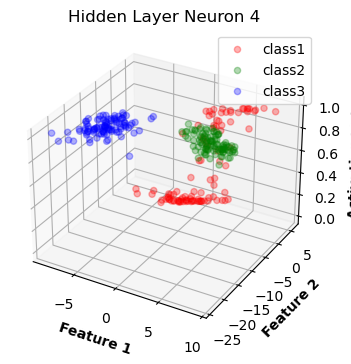

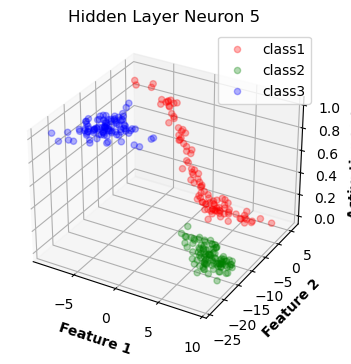

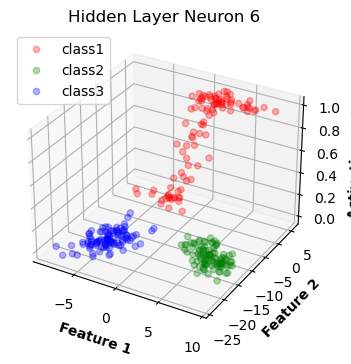

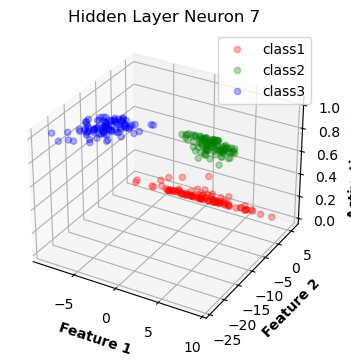

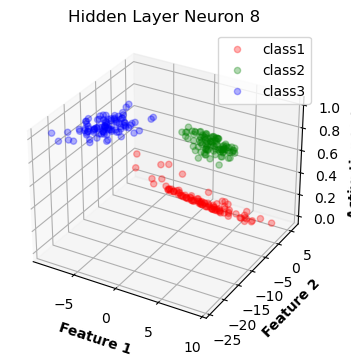

In [17]:
scatterPlot3d(hiddenLayer_1_nodes, OutputLayer_nodes, hj1_value_dict, 'Hidden Layer Neuron')

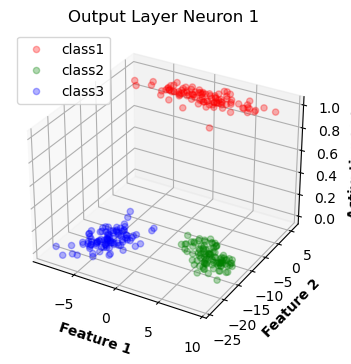

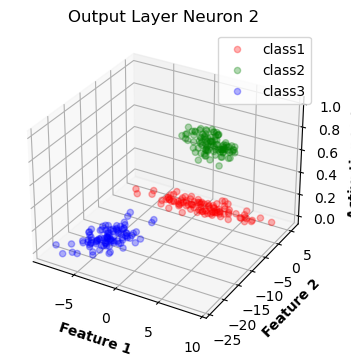

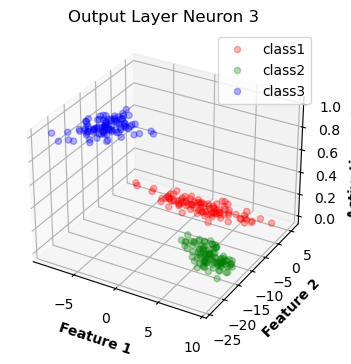

In [18]:
scatterPlot3d(OutputLayer_nodes, OutputLayer_nodes, hk_value_dict, 'Output Layer Neuron')